# **K-Nearest Neighbours**

**Objective:**

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

**Dataset:**

Need to Classify the animal type

**Tasks:**

1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

1) Analyse the data using the visualizations

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('Zoo.csv')
data


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
# Display the first few rows of the dataset
print(data.head())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [ ]:
# Check for data types and null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [ ]:
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


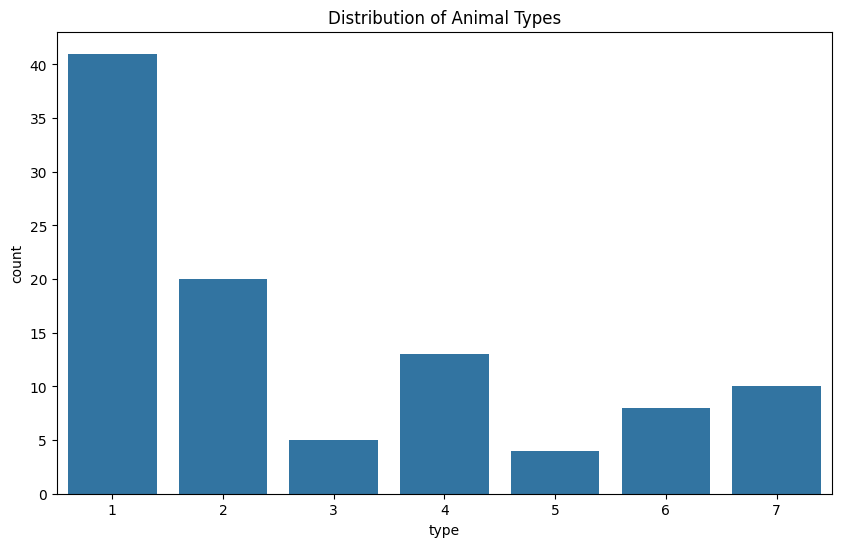

In [ ]:
# Visualize the distribution of animal types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Animal Types')
plt.show()

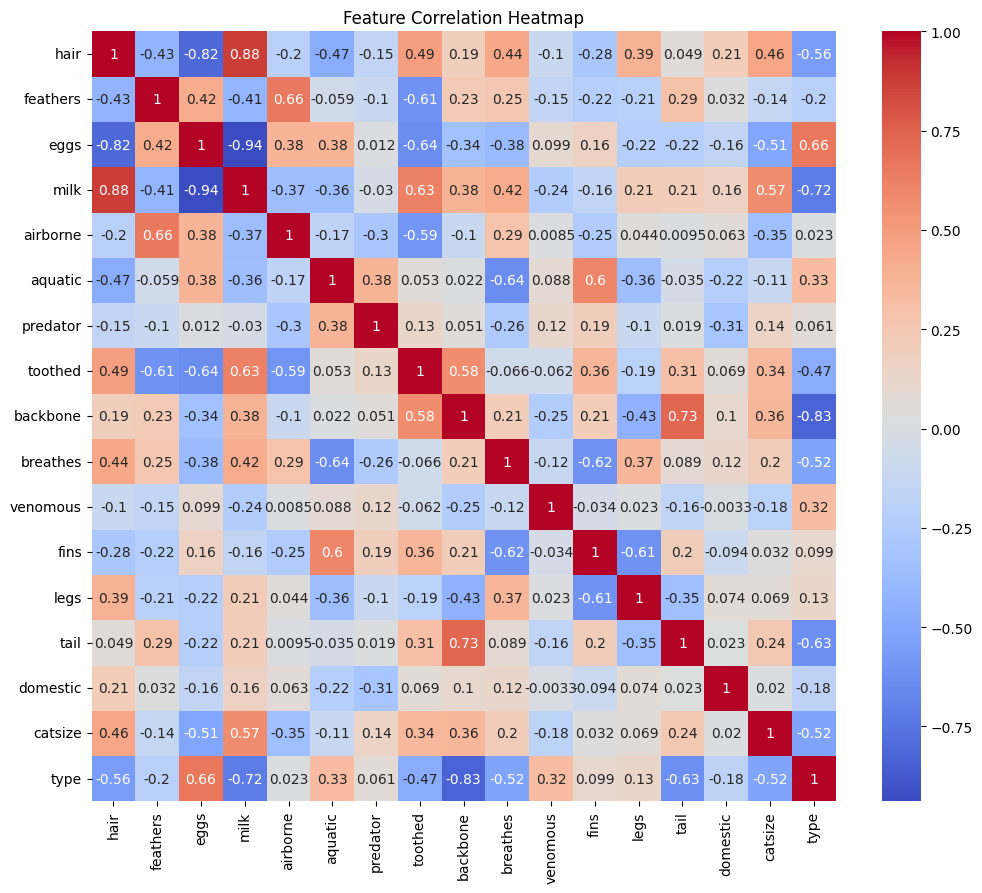

In [ ]:
# Visualize correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

2) Preprocess the data by handling missing values & Outliers, if any.

In [ ]:
# Check for missing values
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


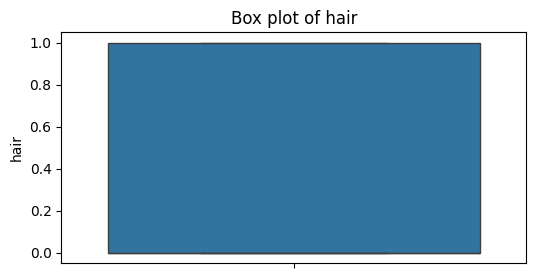

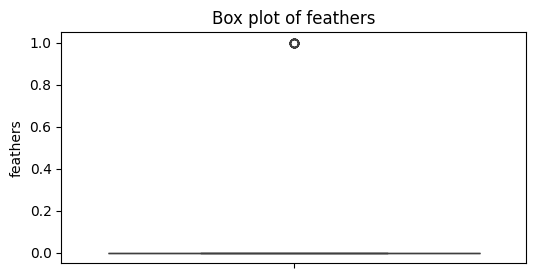

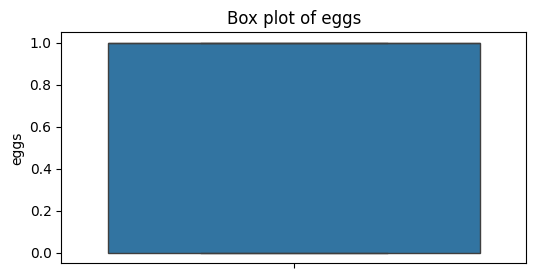

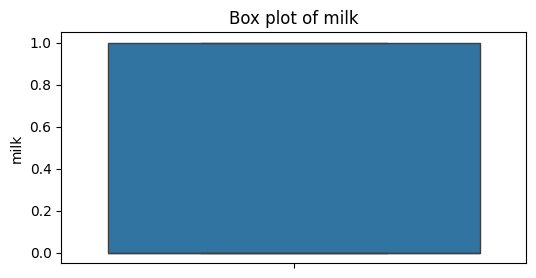

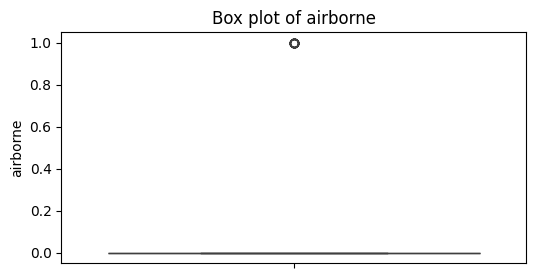

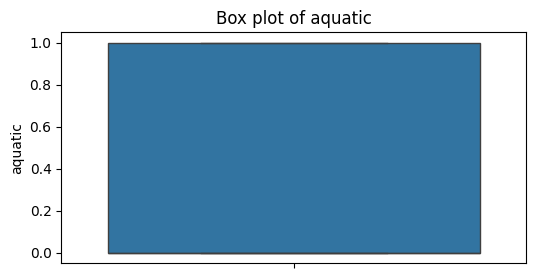

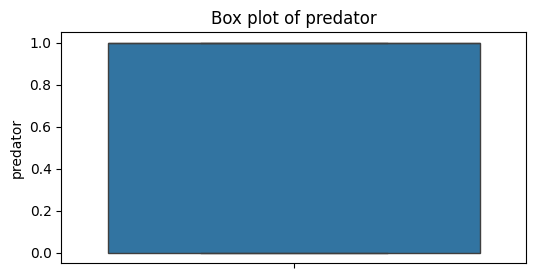

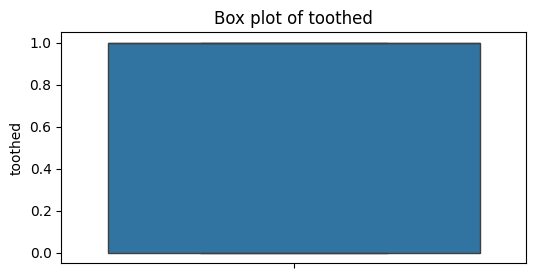

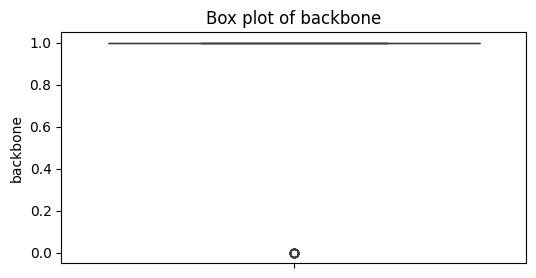

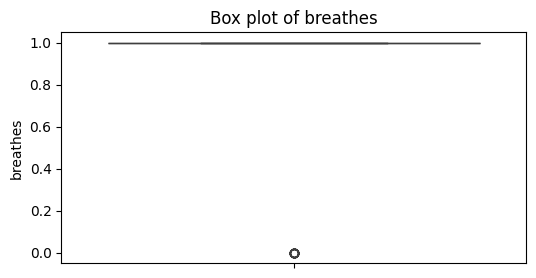

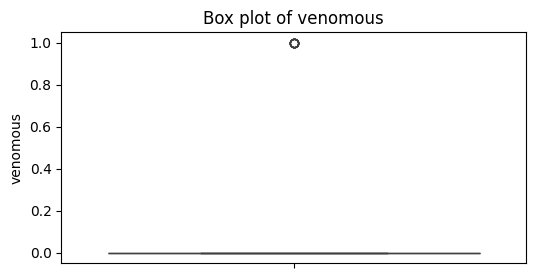

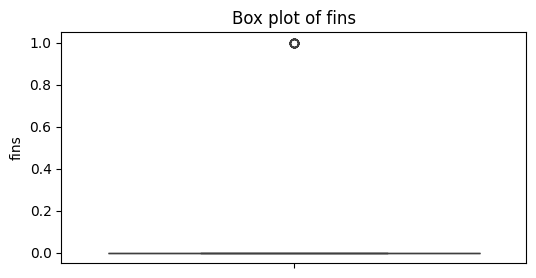

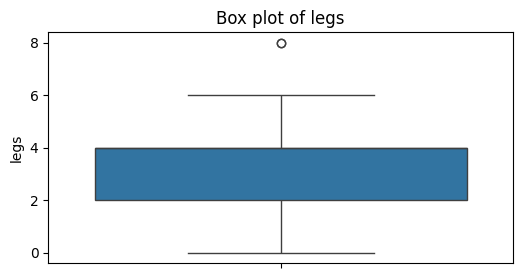

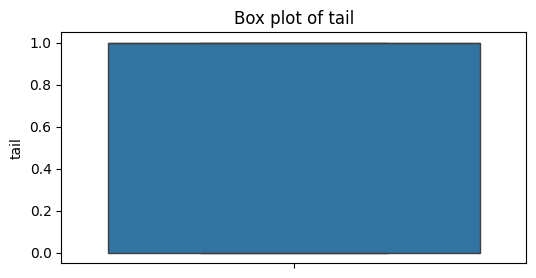

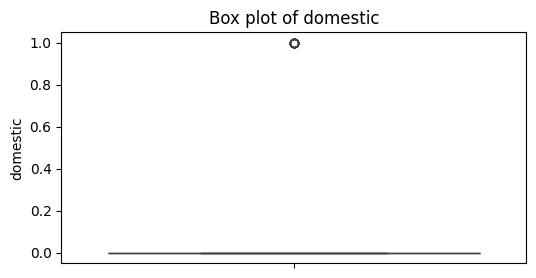

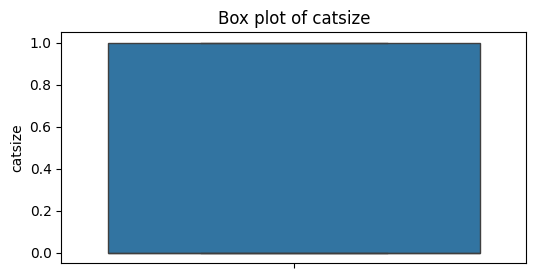

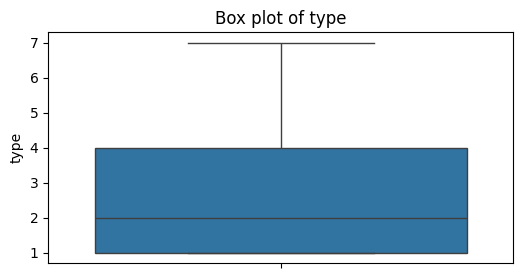

In [ ]:
# Handling outliers isn't typical for categorical data, but let's see if any numerical features exist
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [ ]:
# Convert categorical variables to numerical using Label Encoding or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)
data


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal name_tuatara,animal name_tuna,animal name_vampire,animal name_vole,animal name_vulture,animal name_wallaby,animal name_wasp,animal name_wolf,animal name_worm,animal name_wren
0,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,1,0,0,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,0,0,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,False,False,False,False,False,True,False,False,False,False
97,1,0,1,0,1,0,0,0,0,1,...,False,False,False,False,False,False,True,False,False,False
98,1,0,0,1,0,0,1,1,1,1,...,False,False,False,False,False,False,False,True,False,False
99,0,0,1,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False


3) Split the dataset into training and testing sets (80% training, 20% testing).

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(['type'], axis=1)
y = data['type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4) Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding the best value for K (example using cross-validation)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)
best_knn = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'metric': 'euclidean', 'n_neighbors': 1}


5) Choose an appropriate distance metric and value for K.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding the best value for K (example using cross-validation)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)
best_knn = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'metric': 'euclidean', 'n_neighbors': 1}


6) Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [ ]:
# Train the model with the best parameters
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


7) Visualize the decision boundaries of the classifier.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


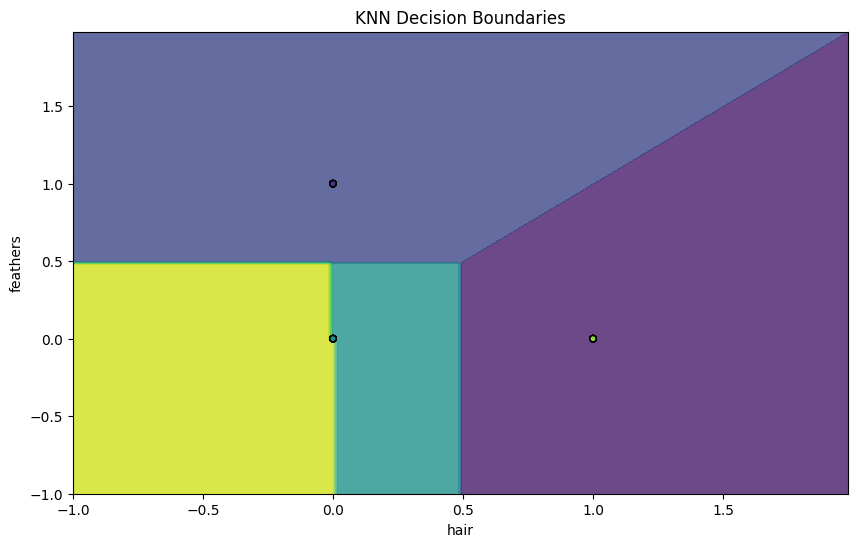

In [ ]:
import numpy as np

# Choose two features for visualization
feature1 = 'hair'
feature2 = 'feathers'

# Fit KNN with these two features
knn_viz = KNeighborsClassifier(n_neighbors=best_knn.n_neighbors, metric=best_knn.metric)
knn_viz.fit(X_train[[feature1, feature2]], y_train)

# Create a mesh grid for plotting decision boundaries
h = 0.02
x_min, x_max = X_train[feature1].min() - 1, X_train[feature1].max() + 1
y_min, y_max = X_train[feature2].min() - 1, X_train[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[feature1], X_train[feature2], c=y_train, edgecolor='k', s=20)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('KNN Decision Boundaries')
plt.show()


**Interview Questions:**

1. **What are the key hyperparameters in KNN?**

Ans: The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm include:

1) Number of Neighbors (n_neighbors):

Description: Specifies the number of neighbors to consider when making a classification or regression decision.

Impact: Smaller values (e.g., k=1) can lead to more complex models that may overfit, while larger values result in smoother decision boundaries that may underfit.

2) Distance Metric (metric):

Description: Determines how the distance between data points is measured. Common distance metrics include:

Euclidean distance: The straight-line distance between two points.

Manhattan distance: The sum of the absolute differences between the coordinates of the points.

Minkowski distance: A generalization of Euclidean and Manhattan distances, parameterized by p.

Other distance metrics: Hamming distance (for categorical data), Chebyshev distance, etc.

Impact: The choice of distance metric can significantly affect the performance of the KNN algorithm, depending on the dataset characteristics.

3) Weight Function (weights):

Description: Determines how the contribution of each neighbor is weighted when making predictions.

Uniform: All neighbors contribute equally.

Distance: Neighbors are weighted by the inverse of their distance; closer neighbors have a greater influence.

Custom: A user-defined function to determine the weights.

Impact: Weighting can improve performance by giving more importance to closer neighbors.

4) Algorithm (algorithm):

Description: Specifies the algorithm used to compute the nearest neighbors.

‘auto’: Automatically selects the best algorithm based on the dataset.

‘ball_tree’: Uses a Ball Tree structure.

‘kd_tree’: Uses a KD Tree structure.

‘brute’: Uses a brute-force search.

Impact: The choice of algorithm can affect computational efficiency, especially for large datasets.

5) Leaf Size (leaf_size):

Description: Affects the speed of the construction and query for Ball Tree and KD Tree algorithms.

Impact: Smaller values can speed up queries but slow down tree construction and increase memory usage. Larger values do the opposite.

6) Power Parameter for Minkowski Metric (p):

Description: Used when metric='minkowski', it defines the power parameter for the Minkowski distance.

p=1: Equivalent to Manhattan distance.

p=2: Equivalent to Euclidean distance.

Impact: Adjusting p allows for flexibility between different distance metrics.

2. **What distance metrics can be used in KNN?**

Ans: In K-Nearest Neighbors (KNN), the distance metric determines how the distance between data points is measured. Various distance metrics can be used, each with its characteristics and suitability for different types of data. Here are some commonly used distance metrics in KNN:

1)  Euclidean Distance

Formula:
∑
𝑖
=
1
𝑛
(
𝑥
𝑖
−
𝑦
𝑖
)
2
∑
i=1
n
​
 (x
i
​
 −y
i
​
 )
2

​

Description: It is the straight-line distance between two points in Euclidean space. It is the most commonly used distance metric.

Use Case: Suitable for continuous numerical data.

2) Manhattan Distance (L1 Norm)

Formula:
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
∑
i=1
n
​
 ∣x
i
​
 −y
i
​
 ∣

Description: It is the sum of the absolute differences between the coordinates of the points. Also known as City Block distance.

Use Case: Suitable for continuous and discrete numerical data, especially when dealing with high-dimensional data.

3) Minkowski Distance

Formula:
(
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
𝑝
)
1
/
𝑝
(∑
i=1
n
​
 ∣x
i
​
 −y
i
​
 ∣
p
 )
1/p

Description: It is a generalized form of both Euclidean and Manhattan distances, parameterized by
𝑝
p.
𝑝
=
1
p=1 gives Manhattan distance.
𝑝
=
2
p=2 gives Euclidean distance.

Use Case: Offers flexibility between Manhattan and Euclidean distance. Suitable for various types of numerical data.

4) Chebyshev Distance (L∞ Norm)

Formula:
max
⁡
(
∣
𝑥
𝑖
−
𝑦
𝑖
∣
)
max(∣x
i
​
 −y
i
​
 ∣)

Description: It is the maximum absolute difference between the coordinates of the points.

Use Case: Useful when dealing with data where the maximum difference in any dimension is the most important.

5) Hamming Distance

Formula:
∑
𝑖
=
1
𝑛
𝐼
(
𝑥
𝑖
≠
𝑦
𝑖
)
∑
i=1
n
​
 I(x
i
​


=y
i
​
 )
𝐼
I is the indicator function which is 1 if
𝑥
𝑖
≠
𝑦
𝑖
x
i
​


=y
i
​
  and 0 otherwise.

Description: It measures the number of positions at which the corresponding elements are different.

Use Case: Suitable for categorical data or binary data, especially in text analysis and genomics.

6) Cosine Distance

Formula:
1
−
∑
𝑖
=
1
𝑛
𝑥
𝑖
𝑦
𝑖
∑
𝑖
=
1
𝑛
𝑥
𝑖
2
∑
𝑖
=
1
𝑛
𝑦
𝑖
2
1−
∑
i=1
n
​
 x
i
2
​

​
  
∑
i=1
n
​
 y
i
2
​

​

∑
i=1
n
​
 x
i
​
 y
i
​

​

Description: Measures the cosine of the angle between two non-zero vectors in a multi-dimensional space.

Use Case: Suitable for high-dimensional data and text data where the orientation rather than magnitude matters.

7) Mahalanobis Distance

Formula:
(
𝑥
−
𝑦
)
𝑇
𝑆
−
1
(
𝑥
−
𝑦
)
(x−y)
T
 S
−1
 (x−y)
​
𝑆

S is the covariance matrix of the data.

Description: It measures the distance between a point and a distribution. Takes into account the correlations between variables.

Use Case: Useful in multivariate data with correlated features.

8) Jaccard Distance

Formula:
1
−
∣
𝑋
∩
𝑌
∣
∣
𝑋
∪
𝑌
∣
1−
∣X∪Y∣
∣X∩Y∣
​

Description: Measures dissimilarity between two sets.

Use Case: Suitable for binary or categorical data, particularly in cases where the data can be represented as sets.